# ** Air Quality Analysis**
---

**The data contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.**




Retrieved from: UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Air+quality)


**Introduction:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. 

**Time Frame:**

Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.



Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. 


Missing values are tagged with -200 value.

**Attributes of the dataset are:**


Date		        -Date (DD/MM/YYYY)


Time		        -Time (HH.MM.SS)

CO(GT)		      -True hourly averaged concentration CO in mg/m^3 (reference analyzer)

PT08.S1(CO)		  -PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

NMHC(GT)		    -True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

C6H6(GT)		    -True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

PT08.S2(NMHC)		-PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

NOx(GT)		      -True hourly averaged NOx concentration in ppb (reference analyzer)

PT08.S3(NOx)		-PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

NO2(GT)		      -True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

PT08.S4(NO2)		-PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

PT08.S5(O3)		  -PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

T		            -Temperature in °C

RH		          -Relative Humidity (%)

AH		          -Absolute Humidity


# **Part 1: Data Exploration**

**Load Libraries:**

We first set up environment and load the librarires. We then retrieve dataset from the drive

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn-white')

**Load Dataset:**

In [0]:
#dataset extraction
colab_flag = True
my_path = '/content/gdrive/My Drive/' 
my_path += 'ALY 6015'

def initialize_path(is_colab, data_path):
  if(is_colab):
    from google.colab import drive 
    drive.mount('/content/gdrive')
  %cd $data_path

In [4]:
initialize_path(colab_flag, my_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/ALY 6015


In [5]:
#current working directory
!pwd 

/content/gdrive/My Drive/ALY 6015


In [6]:
#the dataset available in the above mentioned directory
!ls 

AirQualityUCI.xlsx  temp.txt


In [7]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**Drop Null Values:**

In [0]:
#drop null values
df.dropna(axis=0, how ='all',inplace=True)

In [0]:
df.dropna(axis=1,inplace=True)

**Rename Variables**

Rename the variables from the Chemical Name to the Common Name

In [0]:
df.rename(index=str, columns={"CO(GT)":"CO_Concentrate",
                              "PT08.S1(CO)": "Tin_Oxide",
                              "NMHC(GT)": "Non_Metanic_Hydrocarbons",
                              "C6H6(GT)": "Benzene_Concentration", 
                              "PT08.S2(NMHC)":"Titania_Concentration",
                              "NOx(GT)":"NOx",
                              "PT08.S3(NOx)":"Tungsten_Oxide_NOx",
                              "NO2(GT)":"NO2",
                              "PT08.S4(NO2)":"Tungsten_Oxide_NO2",
                              "PT08.S5(O3)":"Indium_Oxide",
                              "T":"Temperature",
                              "RH":"Relative_Humidity",
                              "AH":"Absolute_Humidity"}, inplace = True)

**Replace -200 values with Backward Fill**

As the missing values are marked as -200 we find the total numbers

In [11]:
df.apply(lambda x : x == -200).sum()

Date                           0
Time                           0
CO_Concentrate              1683
Tin_Oxide                    366
Non_Metanic_Hydrocarbons    8443
Benzene_Concentration        366
Titania_Concentration        366
NOx                         1639
Tungsten_Oxide_NOx           366
NO2                         1642
Tungsten_Oxide_NO2           366
Indium_Oxide                 366
Temperature                  366
Relative_Humidity            366
Absolute_Humidity            366
dtype: int64

In [0]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

Filling the null values with the method of **Backward fill** to give an accurate representation of dataset.

In [0]:
df['CO_Concentrate']=df['CO_Concentrate'].fillna(method='bfill')
df['Tin_Oxide']=df['Tin_Oxide'].fillna(method='bfill')
df['Benzene_Concentration']=df['Benzene_Concentration'].fillna(method='bfill')
df['Titania_Concentration']=df['Titania_Concentration'].fillna(method='bfill')
df['NOx']=df['NOx'].fillna(method='bfill')
df['NO2']=df['NO2'].fillna(method='bfill')
df['Tungsten_Oxide_NOx']=df['Tungsten_Oxide_NOx'].fillna(method='bfill')
df['Tungsten_Oxide_NO2']=df['Tungsten_Oxide_NO2'].fillna(method='bfill')
df['Indium_Oxide']=df['Indium_Oxide'].fillna(method='bfill')
df['Temperature']=df['Temperature'].fillna(method='bfill')
df['Relative_Humidity']=df['Relative_Humidity'].fillna(method='bfill')
df['Absolute_Humidity']=df['Absolute_Humidity'].fillna(method='bfill')

In [14]:
#Check any Null values
df.isnull().sum()

Date                           0
Time                           0
CO_Concentrate                 0
Tin_Oxide                      0
Non_Metanic_Hydrocarbons    8443
Benzene_Concentration          0
Titania_Concentration          0
NOx                            0
Tungsten_Oxide_NOx             0
NO2                            0
Tungsten_Oxide_NO2             0
Indium_Oxide                   0
Temperature                    0
Relative_Humidity              0
Absolute_Humidity              0
dtype: int64

**Drop Unimportant Variables**

As *Non_Metanic_Hydrocarbons* has 8443 values as -200 from the total values of 9358, I am dropping that variable as consideration as it might give us an incorrect annalysis of dataset.

In [0]:
df.drop(['Non_Metanic_Hydrocarbons'],axis=1, inplace= True)

In [0]:
#format date column
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y') 

In [17]:
df

,Date,Time,CO_Concentrate,Tin_Oxide,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [0]:
all_cols = ['CO_Concentrate','Tin_Oxide','Benzene_Concentration','Titania_Concentration','NOx','Tungsten_Oxide_NOx','NO2','Tungsten_Oxide_NO2','Indium_Oxide','Temperature','Relative_Humidity','Absolute_Humidity']

**Create Required Variables**

Create a column for **Month**

In [19]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Time,CO_Concentrate,Tin_Oxide,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity,Month
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


# **Part 2: Exploratory Data Analysis**



**Data Statistics**

In [20]:
df.describe()

,CO_Concentrate,Tin_Oxide,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity,Month
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.179010,1103.261453,10.167377,941.616383,243.098782,832.651322,109.838613,1453.455417,1034.456485,18.147741,49.563462,1.021860,6.310356
std,1.470994,219.938898,7.535855,269.169877,208.776498,257.873913,47.624836,341.117185,409.193822,8.777165,17.214160,0.400088,3.438160
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,1.000000
25%,1.000000,936.750000,4.434582,734.250000,95.300000,652.750000,74.000000,1231.750000,736.750000,11.625000,36.275000,0.737445,3.000000
50%,1.900000,1068.750000,8.301413,911.500000,180.000000,802.750000,106.000000,1456.500000,972.500000,17.575000,50.175000,0.993346,6.000000
75%,3.000000,1241.500000,14.274696,1125.500000,316.000000,964.750000,138.000000,1662.000000,1291.500000,24.125000,62.925000,1.306671,9.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,12.000000


# Representation of the correlation between the variables of Air Quality through Heat Map


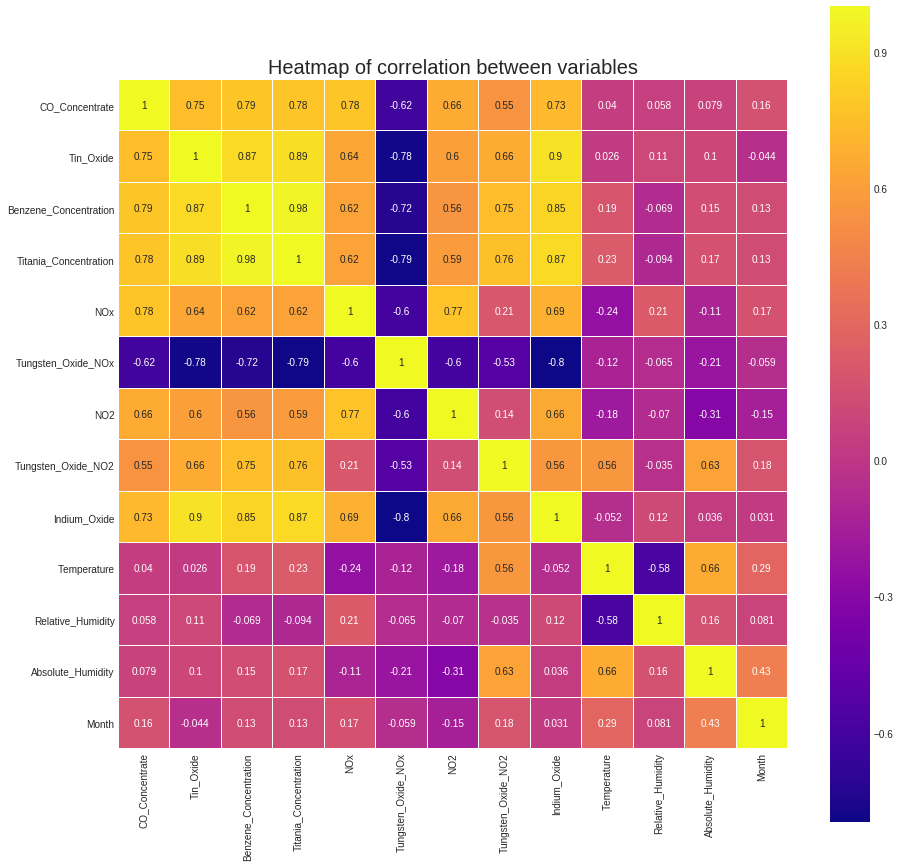

In [21]:
#Use heatmap to see corelation between variables
colormap = plt.cm.plasma
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white')
plt.title('Heatmap of correlation between variables',fontsize=20)
plt.show()

**Correlation Matrix**

In [22]:
df.corr()

,CO_Concentrate,Tin_Oxide,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity,Month
CO_Concentrate,1.000000,0.749876,0.786682,0.779191,0.778496,-0.618741,0.660469,0.549929,0.727845,0.040222,0.057746,0.079033,0.159492
Tin_Oxide,0.749876,1.000000,0.873317,0.888291,0.635569,-0.777718,0.600548,0.662123,0.902370,0.025682,0.112752,0.104295,-0.043636
Benzene_Concentration,0.786682,0.873317,1.000000,0.981777,0.622710,-0.721693,0.555980,0.745160,0.851328,0.187880,-0.069209,0.147046,0.130509
Titania_Concentration,0.779191,0.888291,0.981777,1.000000,0.618222,-0.787788,0.588456,0.759795,0.870490,0.227432,-0.094254,0.165551,0.131134
NOx,0.778496,0.635569,0.622710,0.618222,1.000000,-0.599989,0.774862,0.207119,0.690107,-0.236861,0.214948,-0.112735,0.166187
Tungsten_Oxide_NOx,-0.618741,-0.777718,-0.721693,-0.787788,-0.599989,1.000000,-0.603953,-0.527495,-0.796196,-0.121987,-0.064872,-0.209081,-0.058629
NO2,0.660469,0.600548,0.555980,0.588456,0.774862,-0.603953,1.000000,0.139151,0.655615,-0.182018,-0.069740,-0.305014,-0.149330
Tungsten_Oxide_NO2,0.549929,0.662123,0.745160,0.759795,0.207119,-0.527495,0.139151,1.000000,0.563342,0.558847,-0.034671,0.626246,0.184806
Indium_Oxide,0.727845,0.902370,0.851328,0.870490,0.690107,-0.796196,0.655615,0.563342,1.000000,-0.052498,0.122555,0.036270,0.031210
Temperature,0.040222,0.025682,0.187880,0.227432,-0.236861,-0.121987,-0.182018,0.558847,-0.052498,1.000000,-0.580443,0.658528,0.288800


We can analyze that there is a strong correlation between Benzene Concentration and Titatia Concentration at 0.98, which shows a very strong correlation. 

Also there is a strong correlation at 0.89 between Titania Concentration and Tin Oxide.

# Pairplot 

The pairplot above helps us analyse the best set of features to explain a relationship between two variables or to form the most separated clusters.



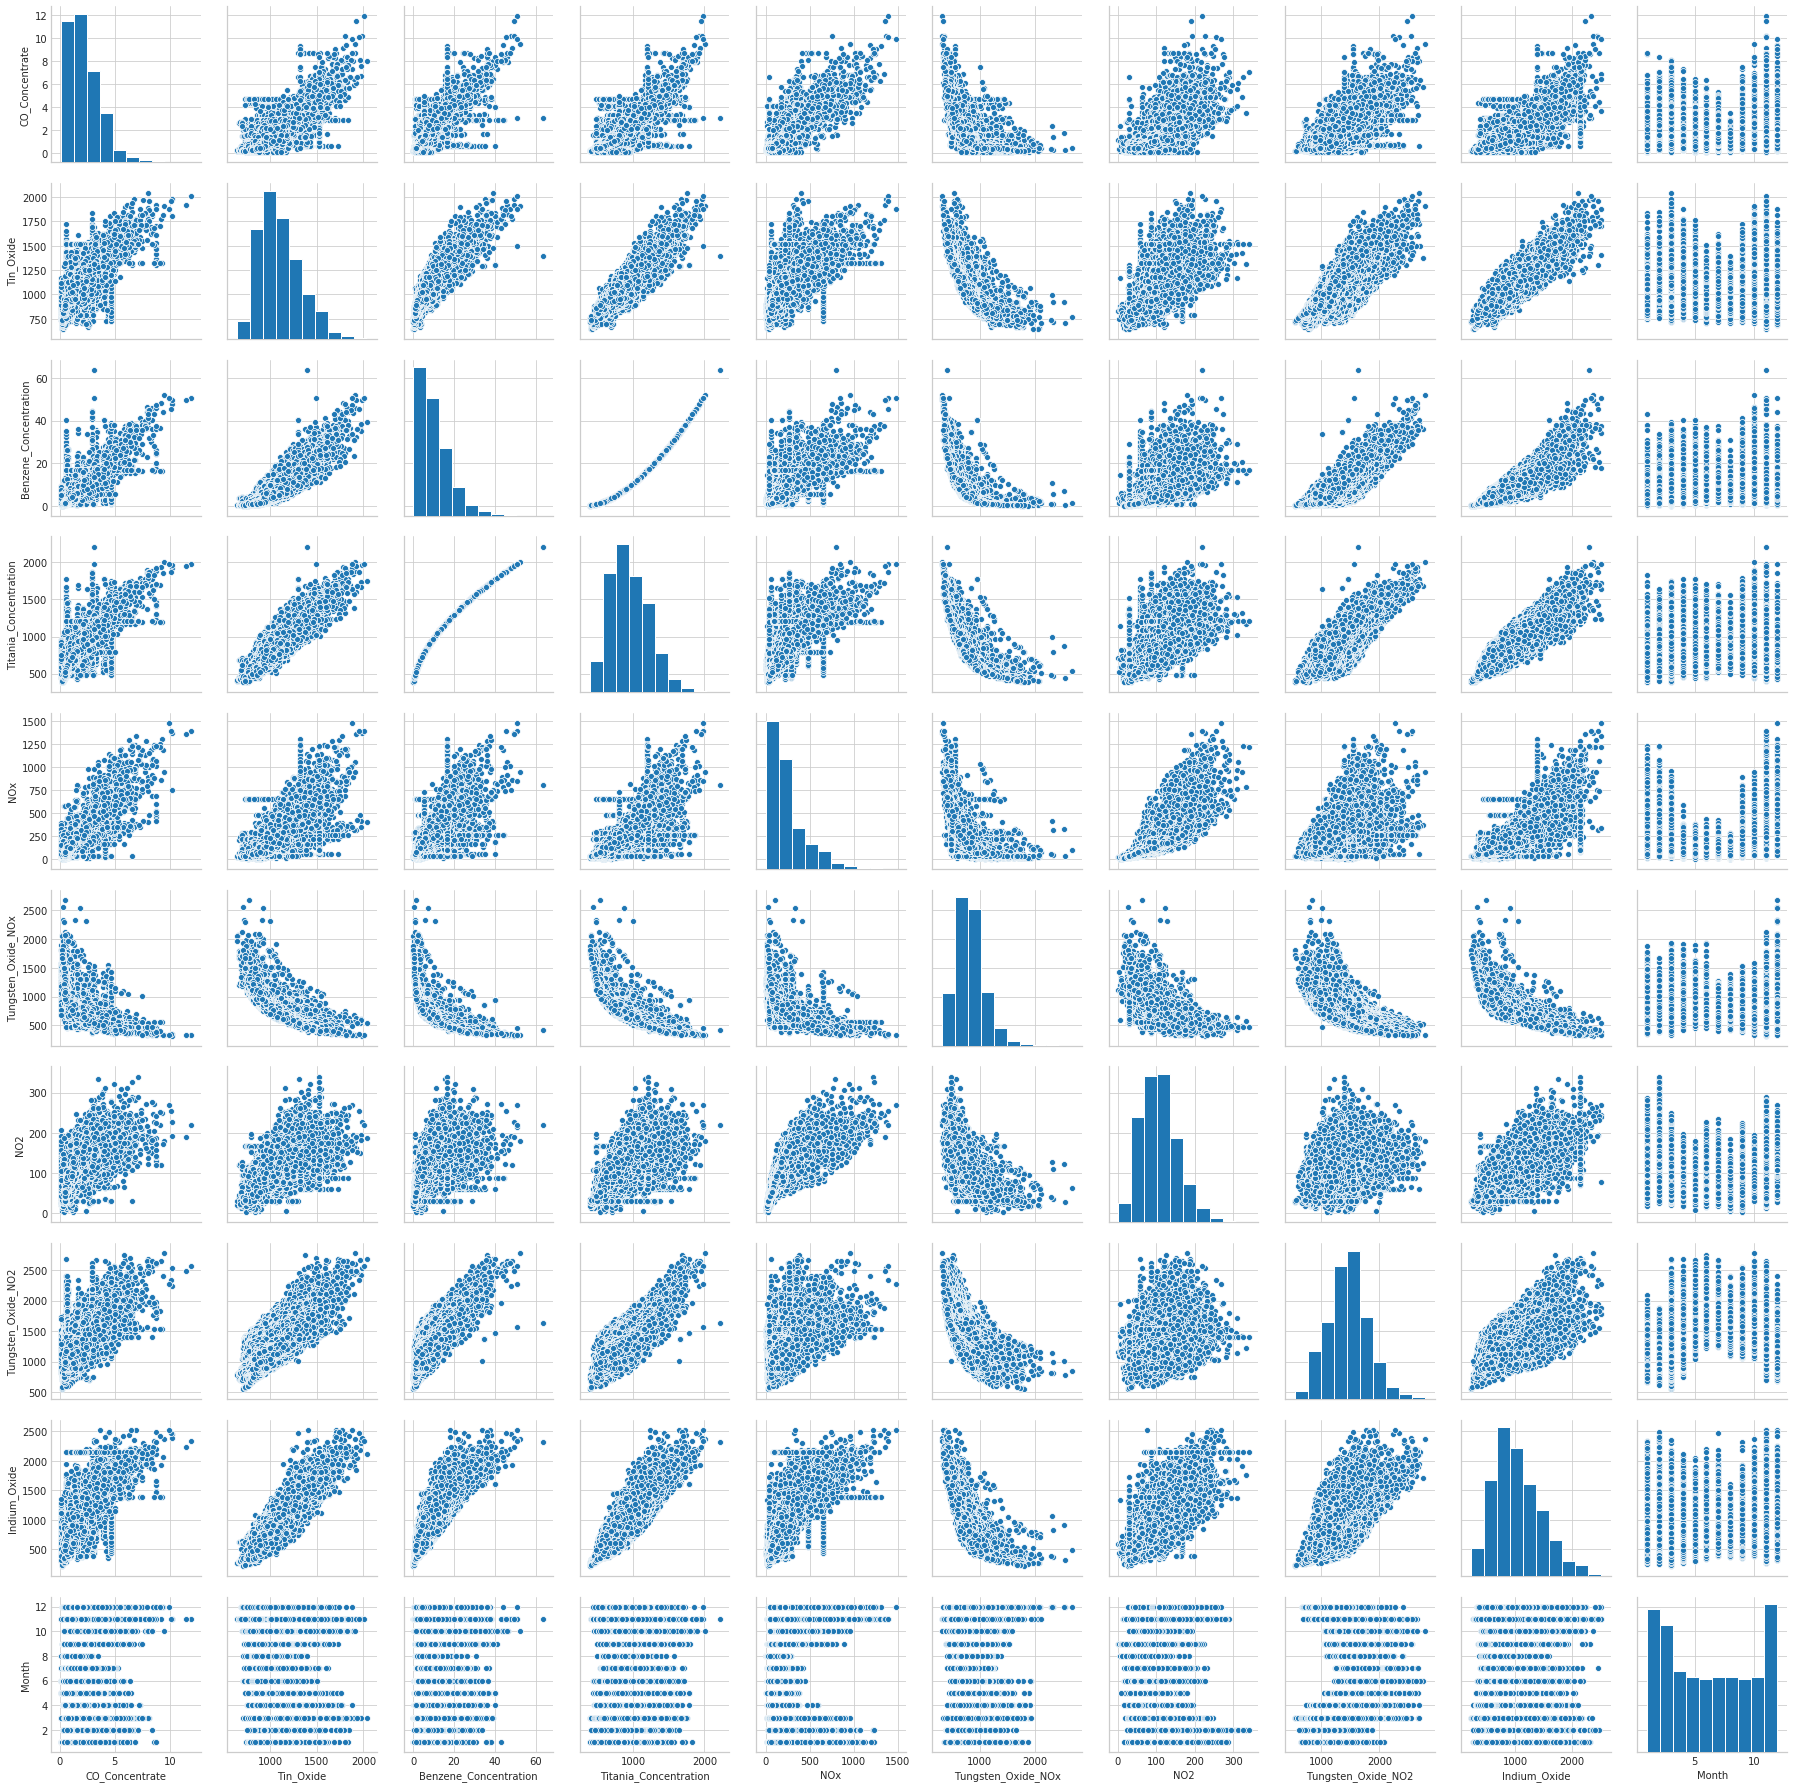

In [23]:
sns.set_style('whitegrid')
eda_data = df.drop(['Time','Relative_Humidity','Absolute_Humidity','Temperature'], axis=1)
sns.pairplot(eda_data)


As we can see except the temperature, Relative Humidity and Absolute Humidity attributes almost all of the other attributes show significant linear dependency with each other.


# How is the Air Quality affected in each time of the year?

Text(0.5, 1.0, 'Toxic Gases Distribution in Air- Monthwise')

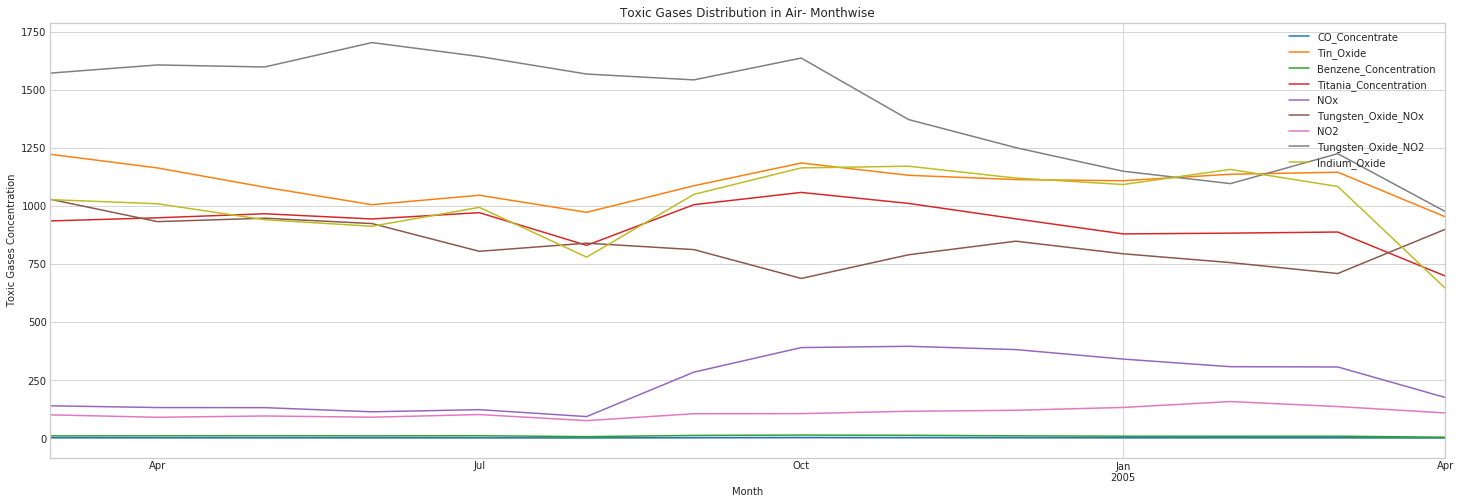

In [24]:
df.set_index('Date', inplace=True)
df.drop(['Time','Relative_Humidity','Absolute_Humidity','Temperature','Month'], axis=1).resample('M').mean().plot(figsize = (25,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('Toxic Gases Concentration')
plt.title("Toxic Gases Distribution in Air- Monthwise")

We can see that the volume of Toxic Gases Concentration in the Air was highest in the time of October 2004. We also witness that during quarter ends there is a peak in the distribution of toxic gases. 

It can be due to the factors such as the companies have to reach their deadlines or complete a consignment. That might lead up to more production in the industires and as a result more emmission of toxic gasses in the environment. It directly relates to the factor that in the quarter end we see distribution of toxic gases in the environment.

# Correlation between Titania and Benzene Concentration

According to the analysis by the Heat Map it is established that there is a very high correltion at 98% between Titania and Benzene Concentration. So lets study how it is affected.

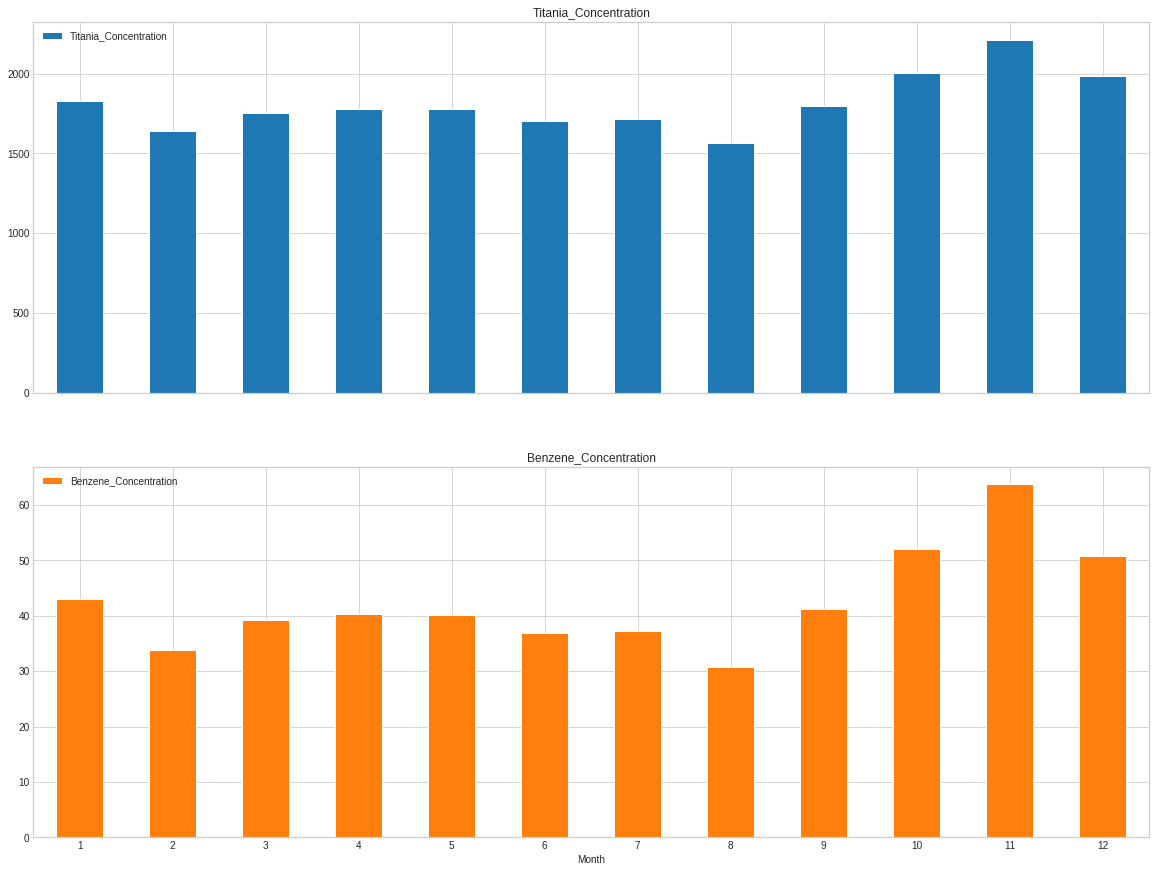

In [25]:
#Group by month
Titania_Benzene = df.groupby(['Month'])['Titania_Concentration', 'Benzene_Concentration'].max()

axes = Titania_Benzene.plot.bar(rot=0, subplots=True,figsize=(20, 15))
axes[1].legend(loc=2) 
plt.style.use('seaborn-white')

In the first bar graph we see Titania Concentration monthwise. The y axis displays mg/m^3 of Titania Concentration. Titania Concentration is maximum in the month of November. It is minimum in the month of August. 

The trend of emission decreases from February till August and spikes from September. As Benzene Concentration is highly correlated with Titania Concentration it also follows the same trend. It  is maximum in the month of November. It is minimum in the month of August. 

# Ground Truth hourly averaged concentrations for CO, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)

As the Ground Truth hourly averaged concentrations for CO_Concentrate, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer we can individually study the relationship between 
these three

Text(0.5, 1.0, 'Histogram of Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)')

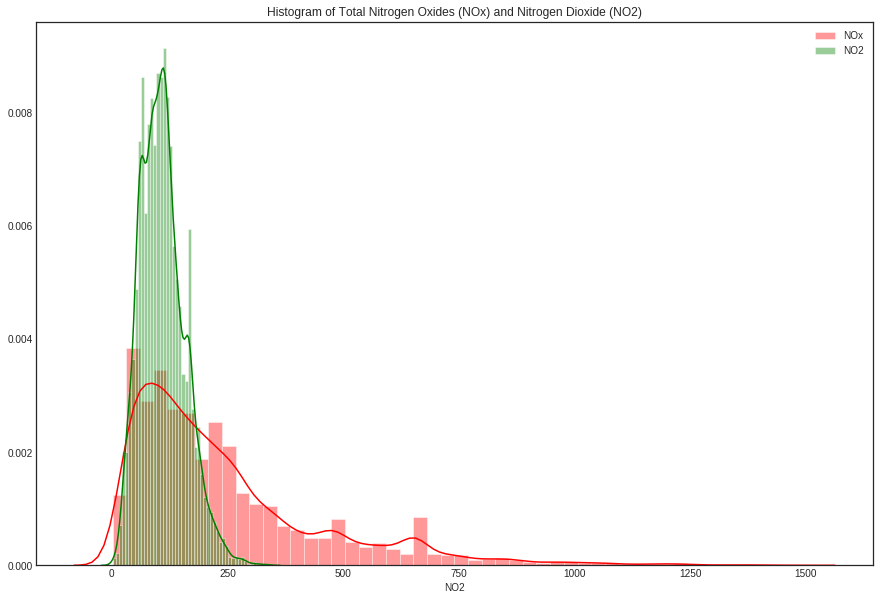

In [26]:
NOx = df['NOx']
NOx.dropna(inplace = True)
NO2 = df['NO2']
NO2.dropna(inplace = True)

sns.distplot(NOx, color='red')
sns.distplot(NO2, color='green')
plt.legend(['NOx','NO2'])
plt.title("Histogram of Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)")

The Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) bar graphs are rightly skewed distributed. The y axis represents the frequency of Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2). The x axis is a continuous variable representing the respective measures. 

We witness that Total Nitrogen Oxides (NOx) is highest at 25-50 whereas  Nitrogen Dioxide (NO2) is highest at 100-125. 

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level Monthwise')

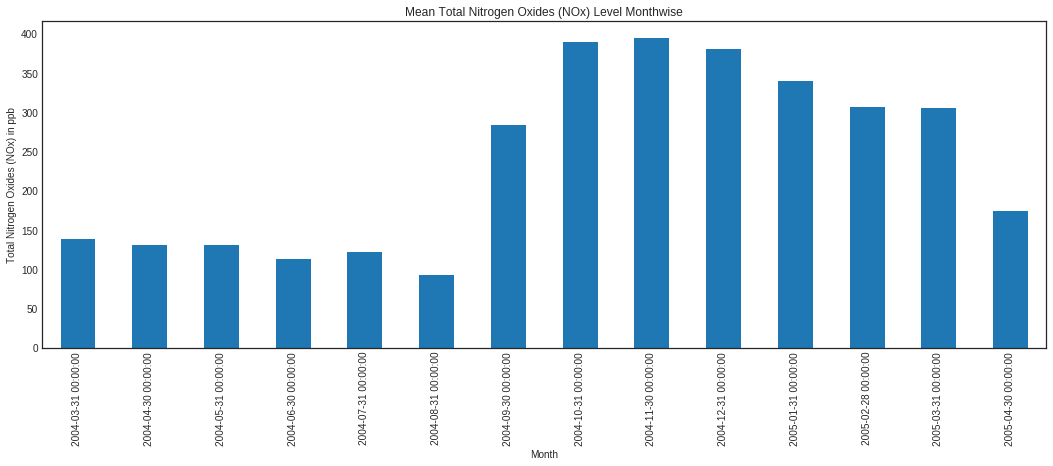

In [27]:
df['NOx'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level Monthwise")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level Hourwise')

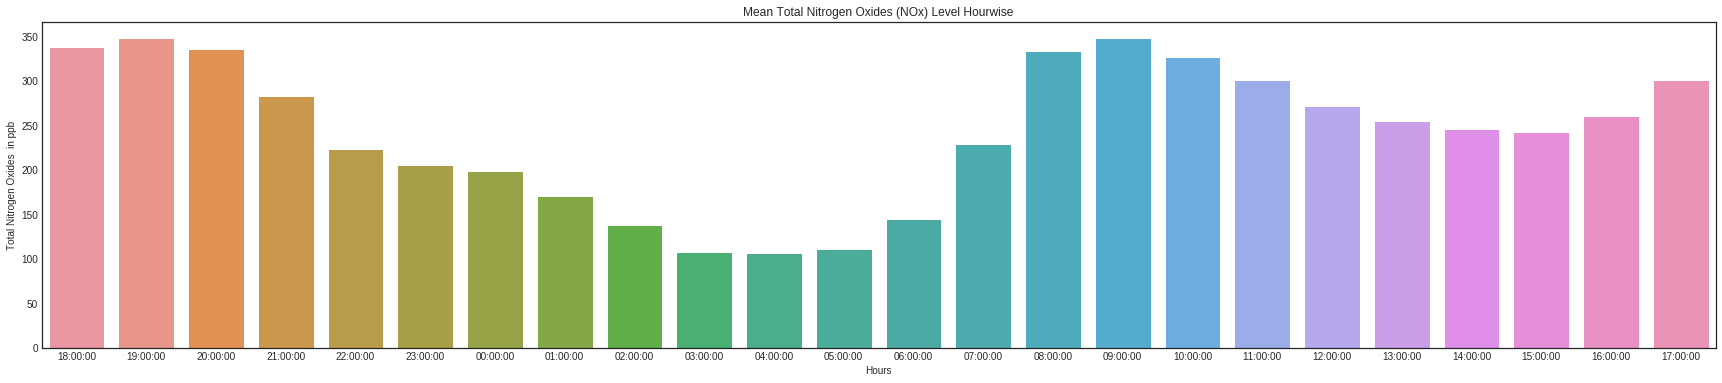

In [28]:
plt.figure(figsize=(30,6))
sns.barplot(x='Time',y='NOx',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides  in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level Hourwise")

We further analyze the Total Mean Nitrogen Oxide is hughest in the month of November and it is the highest in the day  time at 9:00 AM.



# Relationship of Relative Humidity and Absolute Humidity with Temperature

Text(0.5, 1.0, 'Relationship of Relative Humidity and Absolute Humidity with Temperature')

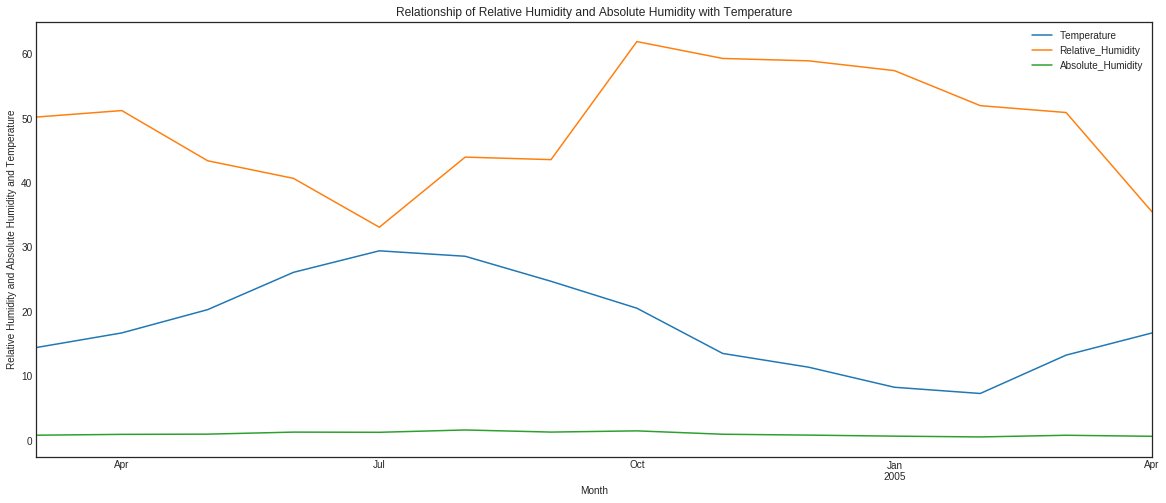

In [30]:
df.drop(['CO_Concentrate','Tin_Oxide','Benzene_Concentration','Titania_Concentration','NOx','Tungsten_Oxide_NOx','NO2','Tungsten_Oxide_NO2','Indium_Oxide','Month'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('Relative Humidity and Absolute Humidity and Temperature')
plt.title("Relationship of Relative Humidity and Absolute Humidity with Temperature")

We witness that there is a direct inverse relationship of Temperature with the Relative Humidity.

That fact can be established due to the scientific theory that if there is high Relative Humidity in the air, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off.

# Part 3: Application/Outcomes

#Split-Train-Test dataset

Now we need to split the dataset into two parts:

1. Target dataset(Actual Y)
2. Predictor dataset(this will help us predict "Predicted Y", based on the given dataset)

Used this dataset from UCI to predict air quality, especially the content of NOx in air, using Linear Regression as model.Done data cleaning, data preprocessing and EDA to analyse and manipulate the data.



In [0]:
X = df.drop(['NOx','Temperature','Time'], axis=1)
y= df['NOx']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6549, 11)
(2808, 11)
(6549,)
(2808,)


# Train, Test, Model using Linear Regression


In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Test vs Predicted : $Y_i$ vs $\\hat{Y}_i$')

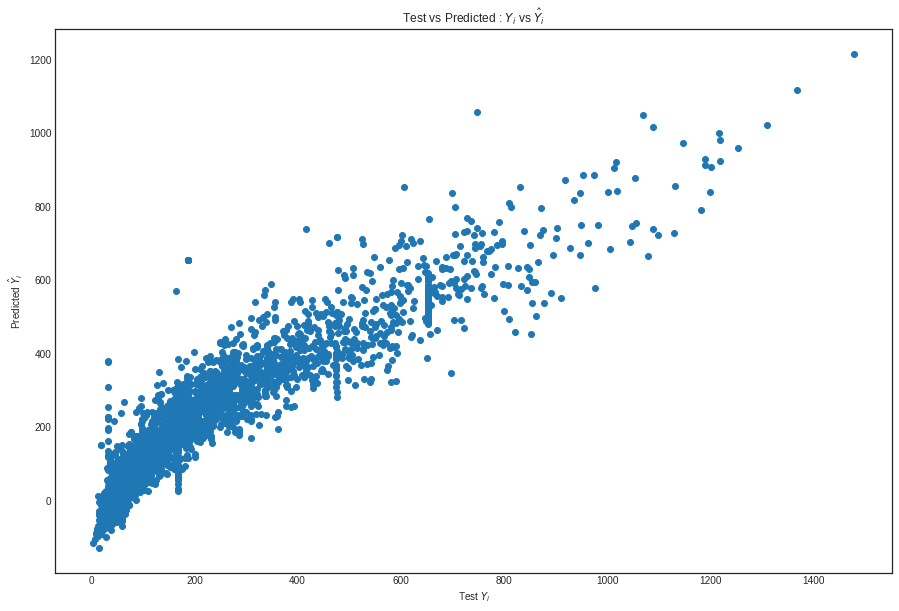

In [35]:
Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Test $Y_i$")
plt.ylabel("Predicted $\hat{Y}_i$")
plt.title("Test vs Predicted : $Y_i$ vs $\hat{Y}_i$")

# Prediction

In [36]:
print(lm.intercept_)

-51.273925672103445


In [37]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO_Concentrate,55.649262
Tin_Oxide,0.038771
Benzene_Concentration,9.829025
Titania_Concentration,0.004624
Tungsten_Oxide_NOx,0.007635
NO2,1.780179
Tungsten_Oxide_NO2,-0.306072
Indium_Oxide,0.025504
Relative_Humidity,2.232285
Absolute_Humidity,79.764626


In [0]:
prediction = lm.predict(X_test)

In [40]:
linear_regression_score = lm.score(X_test, Y_test)
linear_regression_score

0.8424458194204653

# Predictive Analysis : Benzene_Concentration with Titania_Concentration


Text(0.5, 1, 'Scatter Plot')

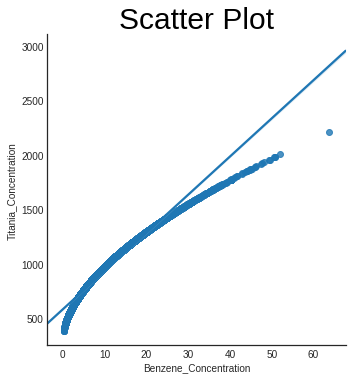

In [41]:
sns.lmplot(x='Benzene_Concentration', y='Titania_Concentration', data=df)
plt.title('Scatter Plot', fontsize=30, c='black')


On the x-axis,we have Benzene Concentration as  the independent variable. Titania Concentration is on the y-axis as the dependent variable. Titania Concentration is dependant on Benzene Concentration. 

The scatter plot representation shows a linear line depecting the relationship between both of them. It relates to the former assumption that both of them are highly correlated.

The concentration of Benzene in air increases in the same speed as the concentration of Titania in air.

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('Benzene_Concentration ~ Titania_Concentration', data = df).fit()
print(results.params)
results.summary()

Intercept               -15.714318
Titania_Concentration     0.027486
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Benzene_Concentration   R-squared:                       0.964
Model:                               OLS   Adj. R-squared:                  0.964
Method:                    Least Squares   F-statistic:                 2.497e+05
Date:                   Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                           19:21:41   Log-Likelihood:                -16637.
No. Observations:                   9357   AIC:                         3.328e+04
Df Residuals:                       9355   BIC:                         3.329e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -15.7143      0.054   -291.702      0.000     -15.820     -15.609
Titania_Concentration     0.0275    5.5e-05    499.679      0.000       0.027       0.028
==============================================================================
Omnibus:                     5420.399   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65183.297
Skew:                           2.572   Prob(JB):                         0.00
Kurtosis:                      14.863   Cond. No.                     3.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


# Evaluation Metrics
Mean Absolute Error

Mean Squared Error

Root Mean Squared Error

In [44]:
from termcolor import colored 
from sklearn import metrics

print(colored('\033[1m'+'What is the Mean Absolute Error?','blue'))
print('MAE:',round(metrics.mean_absolute_error(Y_test, prediction),3))

What is the Mean Absolute Error?
MAE: 60.595


In [45]:
print(colored('\033[1m'+'What is the Mean Squared Error?','blue'))
print('MSE:',round(metrics.mean_squared_error(Y_test, prediction),3))

What is the Mean Squared Error?
MSE: 7207.0


In [47]:
print(colored('\033[1m'+'What is the Root Mean Squared Error?','blue'))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(Y_test, prediction)),3))

What is the Root Mean Squared Error?
RMSE: 84.894


In [46]:
print(colored('\033[1m'+'What is the R Square?','blue'))
print('R Square:', round(metrics.r2_score(Y_test, prediction),3))

What is the R Square?
R Square: 0.842


# Part 4: Inventiveness

# **Google Trends Analysis**

We can witness that there has been an oncrease of environmental protection and climate change in the past few years. We can analyse the talks going on about **Air Quality** on Google.


In [48]:
#Install Google Pytrends
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14260 sha256=bbe7cdf23d5037cf9826c84b90ae46b94dafb953f9c48024d0434fce87a605ea
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [0]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [0]:
kw_list = ["Air Quality"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [52]:
pyt=pytrends.interest_over_time()
pyt

,Air Quality,isPartial
date,,
2004-01-01,8,False
2004-02-01,7,False
2004-03-01,8,False
2004-04-01,8,False
2004-05-01,8,False
...,...,...
2019-09-01,9,False
2019-10-01,18,False
2019-11-01,25,False


In [1]:
fig1=plt.figure(figsize=(20,7))
plt.plot(pyt['Air Quality'])
plt.suptitle('Air Quality- Google Trends')
plt.grid()
plt.show()

NameError: name 'plt' is not defined

From  the Google Trends Analysis we can see an increase of Air Quality talks going on after 2018 till the whole year. It can attributed due to the factor as the United States witnessed the highest number of fires in the state of California. 

There was alot of panic in the US as there have been a lot of talks going on about air quality in that time of the year.